# Part 3: View Variables, Begin Modeling

Author: Julianne Freeman <br>
Created: 1/29/2018 <br>
Updated: 2/25/2018

Step 1: Load Data<br>

Step 2: View growing verse non-growing channels<br>

Step 3: Prep data<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1) Handle missing values<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2) Remove outliers<br>

Step 4: View variables and association of each variable with growth rate<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1) Viewer Interaction<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a) Positive Interaction (likes/view)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b) Negative Interaction (dislikes/view)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c) Neutral Interaction (comments/view)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2) Channel Activity<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a) Posting frequency (videos/year)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3) Video Characteristics<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a) Day of week (weekday/weekend)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b) Time of day (morning/afternoon)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c) Vlogs (vlogs/year)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;e) Video Length (average mins/video)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;f) Average Views (avg views/video)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;g) Max Views (max views/video)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3) Channel Characteristics<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a) Subscriber count (weekday/weekend)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b) Year Began<br>

Step 5: Modeling!<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1) Predict catagorical assignment of channel (classification model)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1) PCA?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2) Predict growth rate of channel (regression model)<br>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 3.6.3 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 5.1.0
OS Darwin 16.1.0 x86_64 i386 64bit
numpy 1.13.3
scipy 0.18.1
matplotlib 2.0.0
pandas 0.19.2
Tue Feb 27 11:48:40 2018 EST

In [2]:
from __future__ import division
from datetime import datetime 
import requests
from lxml import html, etree
import json
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import statsmodels.api as sm

#never print matching warnings
warnings.filterwarnings('ignore') 

#set how pandas displays data
pd.options.display.max_columns = 100
pd.options.display.max_rows = 20
pd.options.display.width = 120

#change the max # of rows pandas will display
pd.options.display.max_rows = 4000

#set to display all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#import seaborn to draw pretty graphs
import seaborn as sns
sns.set_style('whitegrid')

# Step 1: Load data

In [3]:
data=pd.read_csv('Youtube_Part2_cat26_byview_2017_AllData_Final.csv')
del data['Unnamed: 0']
data.shape[0]
data.head(1)

196064

,dateDownloaded,channelId,channelTitle,kind,videoId,title,description,publishedAt,vidfrequency,vidtype,categoryId,videoDuration,commentCount,dislikeCount,likeCount,viewCount,posInteract,negInteract,anyInteract,comInteract,hours,minutes,seconds,total_mins,total_secs,year,month,week,day,dayofyear,vlog,vlogmas,title_length,description_length,title_channel,month_name,season,dayofweek,dayofweek2,type_of_day,hour,timeofday,series,stats_commentCount,stats_hiddenSubscriberCount,stats_subscriberCount,stats_videoCount,stats_viewCount,num_of_playlists,num_of_playlists_forvid
0,2018-02-17T15:32:34,UC4rlAVgAK0SGk-yTfe48Qpw,BRIGHT SIDE,youtube#video,Pb8RAH4ywNY,10 Signs You're STUCK in a Toxic Relationship,Subscribe to Bright Side : https://goo.gl/rQTJ...,2017-06-29T17:00:02.000Z,110,26,26,PT5M47S,560.0,228.0,5101.0,243100.0,2.098313,0.093789,2.192102,0.230358,0,5,47,5,347,2017,6,26,29,180,no,no,45,199,excludes_CT,Jun,summer,3,Thurs,weekday,17,afternoon,no,0,False,7648588,873,1480889507,17,1.0


In [4]:
channelData=pd.read_csv('Youtube_Part2_cat26_byview_2017_ChannelData_Final.csv')
del channelData['Unnamed: 0']
channelData.shape[0]
channelData.head(1)

477

,channelTitle,yearBegan,yearCount,vidCountAll,vidCountBegin,vidCount2015,vidCount2016,vidCount2017,viewMaxAll,viewMaxBegin,viewMax2015,viewMax2016,viewMax2017,viewAvgAll,viewAvgBegin,viewAvg2015,viewAvg2016,viewAvg2017,viewChangeAll,viewChange2015,viewChange2016,viewChange2017,viewLabelAll,viewLabel2015,viewLabel2016,viewLabel2017,viewLabelAll_2,viewLabel2015_2,viewLabel2016_2,viewLabel2017_2,stats_subscriberCount,posInteractAll,negInteractAll,comInteractAll,minsTotalAll,posInteractBegin,negInteractBegin,comInteractBegin,minsTotalBegin,posInteract2015,negInteract2015,comInteract2015,minsTotal2015,posInteract2016,negInteract2016,comInteract2016,minsTotal2016,posInteract2017,negInteract2017,comInteract2017,minsTotal2017,channelSize2,vlogCountAll,vlogCountBegin,vlogCount2015,vlogCount2016,vlogCount2017,dayofweekBegin,dayofweekAll,dayofweek2015,dayofweek2016,dayofweek2017,timeofdayBegin,timeofdayAll,timeofday2015,timeofday2016,timeofday2017
0,BRIGHT SIDE,2017,0,100,100,0,0,100,17909419,17909419,0.0,0.0,17909419.0,1611841,1611841,0.0,0.0,1611841.0,0,0,0,0,same,same,same,same,2,2,2,2,7648588,1.881192,0.138871,0.227285,8.38,1.881192,0.138871,0.227285,8.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.881192,0.138871,0.227285,8.38,large,0.0,0.0,0.0,0.0,0.0,0.28,0.28,0.0,0.0,0.28,0.38,0.38,0.0,0.0,0.38


# Step 2: View growing verse shrinking channels

Preliminary data showed that patterns differ between catagories. For sake of this challenge, will restrict videos for category 26 (beauty/lifestyle) as this is a catagory in which networks have been especially interested in working with.

In [5]:
#view all channels
channels=pd.DataFrame(data.groupby(['channelTitle']).mean()).reset_index() #dont drop index because index is channelTitle
channels.head(1)

#view channels only within + or - 0.5 of catId 26
channels_vid26=channels[(channels['categoryId']>25.5) & (channels['categoryId']<26.5)].reset_index(drop=True)
channels_vid26.head(1)

#only keep channels of cat26
channels_vid26['keep']='yes'
currdf=channels_vid26[['channelTitle','keep']]
data = pd.merge(data, currdf, how='left', on=['channelTitle'])
data=data[data['keep']=='yes'].reset_index(drop=True)
del data['keep']
data.head(1)

,channelTitle,vidfrequency,vidtype,categoryId,commentCount,dislikeCount,likeCount,viewCount,posInteract,negInteract,anyInteract,comInteract,hours,minutes,seconds,total_mins,total_secs,year,month,week,day,dayofyear,title_length,description_length,dayofweek,hour,stats_commentCount,stats_hiddenSubscriberCount,stats_subscriberCount,stats_videoCount,stats_viewCount,num_of_playlists,num_of_playlists_forvid
0,10 Republic,2.0,26.0,24.020202,7.848485,27.0,39.555556,49984.212121,0.153155,0.06318,0.216336,0.023474,0.0,1.727273,33.060606,1.727273,136.69697,2016.585859,9.030303,37.676768,18.323232,262.171717,32.242424,99.989899,2.606061,7.0,0.0,True,0.0,393.0,18771234.0,9.0,1.0


,channelTitle,vidfrequency,vidtype,categoryId,commentCount,dislikeCount,likeCount,viewCount,posInteract,negInteract,anyInteract,comInteract,hours,minutes,seconds,total_mins,total_secs,year,month,week,day,dayofyear,title_length,description_length,dayofweek,hour,stats_commentCount,stats_hiddenSubscriberCount,stats_subscriberCount,stats_videoCount,stats_viewCount,num_of_playlists,num_of_playlists_forvid
0,3S Kitchen,2.0,26.0,26.0,28.117021,32.085106,401.755319,61622.744681,2.236571,0.087714,2.324285,1.171254,0.0,2.691489,27.106383,2.691489,188.595745,2016.989362,6.925532,28.904255,16.797872,196.287234,59.329787,180.393617,2.808511,11.776596,0.0,False,32094.0,117.0,5808330.0,5.0,1.0


,dateDownloaded,channelId,channelTitle,kind,videoId,title,description,publishedAt,vidfrequency,vidtype,categoryId,videoDuration,commentCount,dislikeCount,likeCount,viewCount,posInteract,negInteract,anyInteract,comInteract,hours,minutes,seconds,total_mins,total_secs,year,month,week,day,dayofyear,vlog,vlogmas,title_length,description_length,title_channel,month_name,season,dayofweek,dayofweek2,type_of_day,hour,timeofday,series,stats_commentCount,stats_hiddenSubscriberCount,stats_subscriberCount,stats_videoCount,stats_viewCount,num_of_playlists,num_of_playlists_forvid
0,2018-02-17T15:32:34,UC4rlAVgAK0SGk-yTfe48Qpw,BRIGHT SIDE,youtube#video,Pb8RAH4ywNY,10 Signs You're STUCK in a Toxic Relationship,Subscribe to Bright Side : https://goo.gl/rQTJ...,2017-06-29T17:00:02.000Z,110,26,26,PT5M47S,560.0,228.0,5101.0,243100.0,2.098313,0.093789,2.192102,0.230358,0,5,47,5,347,2017,6,26,29,180,no,no,45,199,excludes_CT,Jun,summer,3,Thurs,weekday,17,afternoon,no,0,False,7648588,873,1480889507,17,1.0


In [6]:
#add information on change in viewcount to main dataframe
col=['channelTitle','viewLabelAll','viewLabel2016']
data=data.merge(channelData[col], on='channelTitle', how='left')
data.head(1)

,dateDownloaded,channelId,channelTitle,kind,videoId,title,description,publishedAt,vidfrequency,vidtype,categoryId,videoDuration,commentCount,dislikeCount,likeCount,viewCount,posInteract,negInteract,anyInteract,comInteract,hours,minutes,seconds,total_mins,total_secs,year,month,week,day,dayofyear,vlog,vlogmas,title_length,description_length,title_channel,month_name,season,dayofweek,dayofweek2,type_of_day,hour,timeofday,series,stats_commentCount,stats_hiddenSubscriberCount,stats_subscriberCount,stats_videoCount,stats_viewCount,num_of_playlists,num_of_playlists_forvid,viewLabelAll,viewLabel2016
0,2018-02-17T15:32:34,UC4rlAVgAK0SGk-yTfe48Qpw,BRIGHT SIDE,youtube#video,Pb8RAH4ywNY,10 Signs You're STUCK in a Toxic Relationship,Subscribe to Bright Side : https://goo.gl/rQTJ...,2017-06-29T17:00:02.000Z,110,26,26,PT5M47S,560.0,228.0,5101.0,243100.0,2.098313,0.093789,2.192102,0.230358,0,5,47,5,347,2017,6,26,29,180,no,no,45,199,excludes_CT,Jun,summer,3,Thurs,weekday,17,afternoon,no,0,False,7648588,873,1480889507,17,1.0,same,same


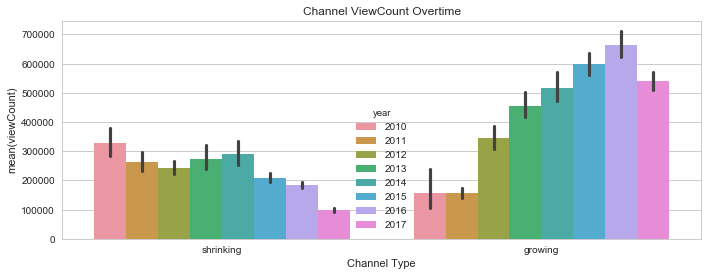

In [7]:
#view average video viewCount overtime in either channels classified as shrinking, growing or staying the same
order=['shrinking', 'growing']
fig, (ax1) = plt.subplots(1,1,figsize=(10,4))
_=sns.barplot(x='viewLabelAll', y='viewCount', hue='year',order=order,data=data, ax=ax1)
_=plt.ylabel('mean(viewCount)')
_=ax1.set_title('Channel ViewCount Overtime')
_=ax1.set_xlabel('Channel Type')
plt.tight_layout()
plt.show()

# Step 4: View variables

define data to use

In [8]:
df=channelData.copy()

In [9]:
#only use channels that were still active in 2016 and sufficient number of subscribers
df=df[(df['vidCount2016']>0) & (df['yearBegan']<2016) & (df['stats_subscriberCount']>100000)]

In [10]:
#view data with missing values
df.isnull().sum()

channelTitle             0
yearBegan                0
yearCount                0
vidCountAll              0
vidCountBegin            0
vidCount2015             0
vidCount2016             0
vidCount2017             0
viewMaxAll               0
viewMaxBegin             0
viewMax2015              1
viewMax2016              0
viewMax2017              7
viewAvgAll               0
viewAvgBegin             0
viewAvg2015              1
viewAvg2016              0
viewAvg2017              7
viewChangeAll            0
viewChange2015           0
viewChange2016           0
viewChange2017           0
viewLabelAll             0
viewLabel2015            0
viewLabel2016            0
viewLabel2017            0
viewLabelAll_2           0
viewLabel2015_2          0
viewLabel2016_2          0
viewLabel2017_2          0
stats_subscriberCount    0
posInteractAll           1
negInteractAll           1
comInteractAll           0
minsTotalAll             0
posInteractBegin         2
negInteractBegin         2
c

Replace any missing values with the median as the median will be less susceptible to outliers than the mean

In [11]:
df['viewChange2017'].fillna((df['viewChange2017'].median()), inplace=True)
df['posInteract2017'].fillna((df['posInteract2017'].median()), inplace=True)
df['negInteract2017'].fillna((df['negInteract2017'].median()), inplace=True)
df['comInteract2017'].fillna((df['comInteract2017'].median()), inplace=True)
df['dayofweek2017'].fillna((df['dayofweek2017'].median()), inplace=True)
df['timeofday2017'].fillna((df['timeofday2017'].median()), inplace=True)
df['minsTotal2017'].fillna((df['minsTotal2017'].median()), inplace=True)

df['viewChange2016'].fillna((df['viewChange2016'].median()), inplace=True)
df['posInteract2016'].fillna((df['posInteract2016'].median()), inplace=True)
df['negInteract2016'].fillna((df['negInteract2016'].median()), inplace=True)
df['comInteract2016'].fillna((df['comInteract2016'].median()), inplace=True)
df['dayofweek2016'].fillna((df['dayofweek2016'].median()), inplace=True)
df['timeofday2016'].fillna((df['timeofday2016'].median()), inplace=True)
df['minsTotal2016'].fillna((df['minsTotal2016'].median()), inplace=True)

df['viewChange2015'].fillna((df['viewChange2015'].median()), inplace=True)
df['posInteract2015'].fillna((df['posInteract2015'].median()), inplace=True)
df['negInteract2015'].fillna((df['negInteract2015'].median()), inplace=True)
df['comInteract2015'].fillna((df['comInteract2015'].median()), inplace=True)
df['dayofweek2015'].fillna((df['dayofweek2015'].median()), inplace=True)
df['timeofday2015'].fillna((df['timeofday2015'].median()), inplace=True)
df['minsTotal2015'].fillna((df['minsTotal2015'].median()), inplace=True)

Use Turkey method (Tukey JW., 1977) to detect ouliers which defines an interquartile range comprised between the 1st and 3rd quartile of the distribution values (IQR). An outlier is a row that have a feature value outside the (IQR +- an outlier step).

In [12]:
def remove_outlier(df,col):
    Q1 = np.percentile(df[col],25)
    Q3 = np.percentile(df[col],75)
    IQR = Q3 - Q1

    step = IQR*2
    high_range = Q3+step
    low_range = Q1-step
    df = df[(df[col] < high_range) & (df[col] > low_range)]
    return df

In [13]:
# remove outliers
print('begin')
print('remaining channels: %d\n' % df.shape[0])

print('viewChange')
col='viewChange2016'
df=remove_outlier(df,col)
print('remaining channels: %d\n' % df.shape[0])

print('posInteract')
col='posInteract2015'
df=remove_outlier(df,col)
print('remaining channels: %d\n' % df.shape[0])

print('negInteract')
col='negInteract2015'
df=remove_outlier(df,col)
print('remaining channels: %d\n' % df.shape[0])

print('comInteract')
col='comInteract2015'
df=remove_outlier(df,col)
print('remaining channels: %d\n' % df.shape[0])

print('minsTotal')
col='minsTotal2015'
df=remove_outlier(df,col)
print('remaining channels: %d\n' % df.shape[0])

print('viewMax')
col='viewMax2015'
df=remove_outlier(df,col)
print('remaining channels: %d\n' % df.shape[0])

print('subscribers')
col='stats_subscriberCount'
df=remove_outlier(df,col)
print('remaining channels: %d\n' % df.shape[0])

begin
remaining channels: 323

viewChange
remaining channels: 261

posInteract
remaining channels: 261

negInteract
remaining channels: 251

comInteract
remaining channels: 247

minsTotal
remaining channels: 236

viewMax
remaining channels: 224

subscribers
remaining channels: 215



Ensure that all variables are floats

In [14]:
df['yearBegan']=df['yearBegan'].astype(int)
df['yearCount']=df['yearCount'].astype(int)
df['stats_subscriberCount']=df['stats_subscriberCount'].astype(int)

df['viewChangeAll']=df['viewChangeAll'].astype(float)
df['viewChange2015 	']=df['viewChange2015'].astype(float)
df['viewChange2016']=df['viewChange2016'].astype(float)

df['posInteractAll']=df['posInteractAll'].astype(float)
df['negInteractAll']=df['negInteractAll'].astype(float)
df['comInteractAll']=df['comInteractAll'].astype(float)
df['minsTotalAll']=df['minsTotalAll'].astype(float)

df['posInteractBegin']=df['posInteractBegin'].astype(float)
df['negInteractBegin']=df['negInteractBegin'].astype(float)
df['comInteractBegin']=df['comInteractBegin'].astype(float)
df['minsTotalBegin']=df['minsTotalBegin'].astype(float)

df['posInteract2015']=df['posInteract2015'].astype(float)
df['negInteract2015']=df['negInteract2015'].astype(float)
df['comInteract2015']=df['comInteract2015'].astype(float)
df['minsTotal2015']=df['minsTotal2015'].astype(float)

df['posInteract2016']=df['posInteract2016'].astype(float)
df['negInteract2016']=df['negInteract2016'].astype(float)
df['comInteract2016']=df['comInteract2016'].astype(float)
df['minsTotal2016']=df['minsTotal2016'].astype(float)

## Step 3: Define dataframes

In [15]:
df.shape[0]
# only consider channels that are growing or shrinking
df=df[df['viewLabel2016']!='same']
df.shape[0]
df5=df

print(' 2015 grow verse shrink')
df_shrink_2015=df[df['viewLabel2015']=='shrinking']
df_shrink_2015.shape[0]
df_grow_2015=df[df['viewLabel2015']=='growing']
df_grow_2015.shape[0]

215

215

 2015 grow verse shrink


103

97

## Step 4: Basic information on channels (grow verse shrink)

In [16]:
col=['stats_subscriberCount','vidCount2015','viewAvg2015','viewChange2016']
df_grow_2015[col].describe()

,stats_subscriberCount,vidCount2015,viewAvg2015,viewChange2016
count,9.700000e+01,97.000000,9.700000e+01,97.000000
mean,7.731332e+05,64.948454,2.605507e+05,-16084.793814
std,6.442174e+05,28.637596,2.533598e+05,142642.805828
min,1.045560e+05,4.000000,1.744103e+04,-401193.000000
25%,2.866950e+05,42.000000,9.834666e+04,-90168.000000
50%,5.340930e+05,67.000000,1.632105e+05,-13433.000000
75%,1.045678e+06,95.000000,3.160452e+05,42534.000000
max,2.473188e+06,100.000000,1.410545e+06,341064.000000


In [17]:
col=['stats_subscriberCount','vidCount2015','viewAvg2015','viewChange2016']
df_grow_2015[df_grow_2015['viewLabel2016']=='growing'][col].describe()

,stats_subscriberCount,vidCount2015,viewAvg2015,viewChange2016
count,4.100000e+01,41.000000,41.000000,41.000000
mean,8.287436e+05,68.707317,197638.390042,103093.804878
std,6.409617e+05,29.052748,147927.184938,95391.592265
min,1.437020e+05,6.000000,26628.280000,1001.000000
25%,3.360750e+05,49.000000,103002.000000,33759.000000
50%,6.227110e+05,72.000000,146549.000000,86224.000000
75%,1.045678e+06,100.000000,245372.000000,139028.000000
max,2.473188e+06,100.000000,673377.368421,341064.000000


In [18]:
col=['stats_subscriberCount','vidCount2015','viewAvg2015','viewChange2016']
df_grow_2015[df_grow_2015['viewLabel2016']=='shrinking'][col].describe()

,stats_subscriberCount,vidCount2015,viewAvg2015,viewChange2016
count,5.600000e+01,56.000000,5.600000e+01,56.000000
mean,7.324184e+05,62.196429,3.066115e+05,-103340.553571
std,6.493163e+05,28.272968,3.016913e+05,102746.115183
min,1.045560e+05,4.000000,1.744103e+04,-401193.000000
25%,2.499360e+05,38.750000,9.616904e+04,-136479.750000
50%,4.695385e+05,64.000000,1.758753e+05,-73378.500000
75%,1.034495e+06,88.250000,4.088048e+05,-27923.500000
max,2.364829e+06,100.000000,1.410545e+06,-4645.000000


### Viewer Interaction

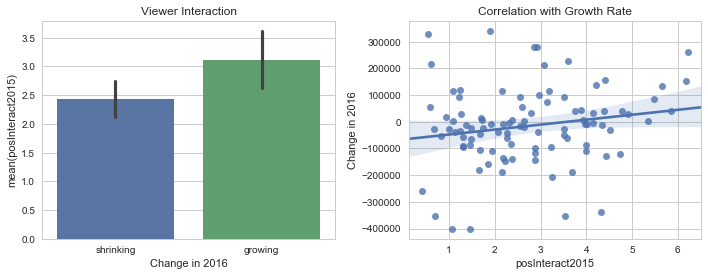

Test statistic: 2.341490
p-value: 0.021297


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         viewChange2016   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.318
Date:                Tue, 27 Feb 2018   Prob (F-statistic):             0.0717
Time:                        11:49:47   Log-Likelihood:                -1286.7
No. Observations:                  97   AIC:                             2577.
Df Residuals:                      95   BIC:                             2582.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const           -6.636e+04   3.11e+04     -2.134      0.035     -1.28e+05 -4638.483
posInteract2015  1.848e+04   1.01e+04      1.822      0.072     -1660.409  3.86e+04
==============================================================================
Omnibus:                        4.281   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                5.347
Skew:                          -0.060   Prob(JB):                       0.0690
Kurtosis:                       4.144   Cond. No.                         7.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
order=['shrinking','growing']
col='posInteract2015'
title='Viewer Interaction'
fig, axes = plt.subplots(1,2,figsize=(10,4))
_=sns.barplot(x='viewLabel2016', y=col,order=order,data=df_grow_2015, ax=axes[0])
_=sns.regplot(x=col, y='viewChange2016',data=df_grow_2015, ax=axes[1])
_=axes[0].set_title(title)
_=axes[1].set_title('Correlation with Growth Rate')
_=axes[0].set_xlabel('Change in 2016')
_=axes[1].set_ylabel('Change in 2016')
plt.tight_layout()
plt.show()

import scipy as sp
a = df_grow_2015[df_grow_2015['viewLabel2016']=='growing'][col]
b = df_grow_2015[df_grow_2015['viewLabel2016']=='shrinking'][col]
results=sp.stats.ttest_ind(a, b)
print('Test statistic: %f' % results[0])
print('p-value: %f' % results[1])

y = df_grow_2015['viewChange2016']  # response
X = df_grow_2015[col] # predictor
X = sm.add_constant(X)
est = sm.OLS(y.astype(float), X.astype(float))
est = est.fit()
est.summary()

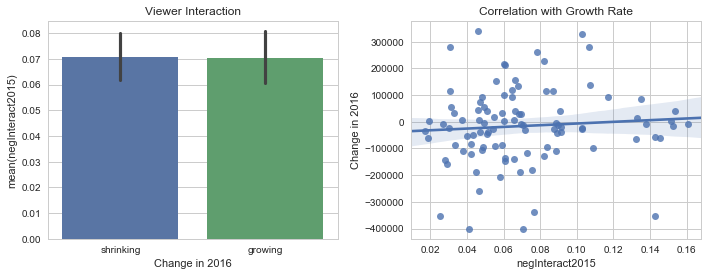

Test statistic: -0.015361
p-value: 0.987777


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         viewChange2016   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5585
Date:                Tue, 27 Feb 2018   Prob (F-statistic):              0.457
Time:                        11:49:53   Log-Likelihood:                -1288.1
No. Observations:                  97   AIC:                             2580.
Df Residuals:                      95   BIC:                             2585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const            -3.83e+04   3.31e+04     -1.158      0.250     -1.04e+05  2.74e+04
negInteract2015  3.151e+05   4.22e+05      0.747      0.457     -5.22e+05  1.15e+06
==============================================================================
Omnibus:                        3.924   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                4.274
Skew:                          -0.150   Prob(JB):                        0.118
Kurtosis:                       3.983   Cond. No.                         29.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
col='negInteract2015'
title='Viewer Interaction'
fig, axes = plt.subplots(1,2,figsize=(10,4))
_=sns.barplot(x='viewLabel2016', y=col,order=order,data=df_grow_2015, ax=axes[0])
_=sns.regplot(x=col, y='viewChange2016',data=df_grow_2015, ax=axes[1])
_=axes[0].set_title(title)
_=axes[1].set_title('Correlation with Growth Rate')
_=axes[0].set_xlabel('Change in 2016')
_=axes[1].set_ylabel('Change in 2016')
plt.tight_layout()
plt.show()

import scipy as sp
a = df_grow_2015[df_grow_2015['viewLabel2016']=='growing'][col]
b = df_grow_2015[df_grow_2015['viewLabel2016']=='shrinking'][col]
results=sp.stats.ttest_ind(a, b)
print('Test statistic: %f' % results[0])
print('p-value: %f' % results[1])

y = df_grow_2015['viewChange2016']  # response
X = df_grow_2015[col] # predictor
X = sm.add_constant(X)
est = sm.OLS(y.astype(float), X.astype(float))
est = est.fit()
est.summary()

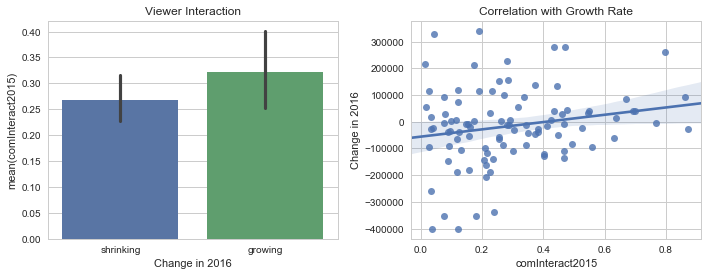

Test statistic: 1.269978
p-value: 0.207194


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         viewChange2016   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.806
Date:                Tue, 27 Feb 2018   Prob (F-statistic):             0.0540
Time:                        11:49:55   Log-Likelihood:                -1286.4
No. Observations:                  97   AIC:                             2577.
Df Residuals:                      95   BIC:                             2582.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const           -5.585e+04   2.49e+04     -2.244      0.027     -1.05e+05 -6443.949
comInteract2015  1.365e+05      7e+04      1.951      0.054     -2411.521  2.75e+05
==============================================================================
Omnibus:                        2.950   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                2.905
Skew:                           0.050   Prob(JB):                        0.234
Kurtosis:                       3.842   Cond. No.                         5.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
col='comInteract2015'
title='Viewer Interaction'
fig, axes = plt.subplots(1,2,figsize=(10,4))
_=sns.barplot(x='viewLabel2016', y=col,order=order,data=df_grow_2015, ax=axes[0])
_=sns.regplot(x=col, y='viewChange2016',data=df_grow_2015, ax=axes[1])
_=axes[0].set_title(title)
_=axes[1].set_title('Correlation with Growth Rate')
_=axes[0].set_xlabel('Change in 2016')
_=axes[1].set_ylabel('Change in 2016')
plt.tight_layout()
plt.show()

import scipy as sp
a = df_grow_2015[df_grow_2015['viewLabel2016']=='growing'][col]
b = df_grow_2015[df_grow_2015['viewLabel2016']=='shrinking'][col]
results=sp.stats.ttest_ind(a, b)
print('Test statistic: %f' % results[0])
print('p-value: %f' % results[1])

y = df_grow_2015['viewChange2016']  # response
X = df_grow_2015[col] # predictor
X = sm.add_constant(X)
est = sm.OLS(y.astype(float), X.astype(float))
est = est.fit()
est.summary()

### Channel Activity

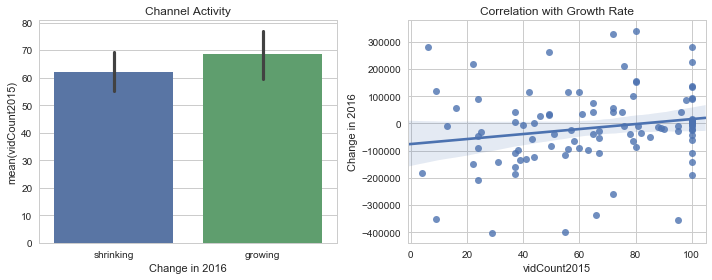

Test statistic: 1.107427
p-value: 0.270905


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         viewChange2016   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     3.328
Date:                Mon, 26 Feb 2018   Prob (F-statistic):             0.0713
Time:                        01:08:50   Log-Likelihood:                -1286.7
No. Observations:                  97   AIC:                             2577.
Df Residuals:                      95   BIC:                             2582.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const         -7.56e+04   3.56e+04     -2.122      0.036     -1.46e+05 -4875.081
vidCount2015   916.3456    502.314      1.824      0.071       -80.873  1913.564
==============================================================================
Omnibus:                        3.742   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                4.320
Skew:                          -0.032   Prob(JB):                        0.115
Kurtosis:                       4.032   Cond. No.                         177.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
col='vidCount2015'
title='Channel Activity'
fig, axes = plt.subplots(1,2,figsize=(10,4))
_=sns.barplot(x='viewLabel2016', y=col,order=order,data=df_grow_2015, ax=axes[0])
_=sns.regplot(x=col, y='viewChange2016',data=df_grow_2015, ax=axes[1])
_=axes[0].set_title(title)
_=axes[1].set_title('Correlation with Growth Rate')
_=axes[0].set_xlabel('Change in 2016')
_=axes[1].set_ylabel('Change in 2016')
plt.tight_layout()
plt.show()

import scipy as sp
a = df_grow_2015[df_grow_2015['viewLabel2016']=='growing'][col]
b = df_grow_2015[df_grow_2015['viewLabel2016']=='shrinking'][col]
results=sp.stats.ttest_ind(a, b)
print('Test statistic: %f' % results[0])
print('p-value: %f' % results[1])

y = df_grow_2015['viewChange2016']  # response
X = df_grow_2015[col] # predictor
X = sm.add_constant(X)
est = sm.OLS(y.astype(float), X.astype(float))
est = est.fit()
est.summary()

### Video Characteristics

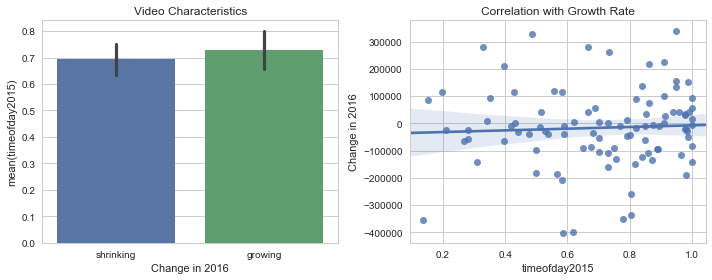

Test statistic: 0.765222
p-value: 0.446036


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         viewChange2016   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2505
Date:                Mon, 26 Feb 2018   Prob (F-statistic):              0.618
Time:                        01:08:54   Log-Likelihood:                -1288.2
No. Observations:                  97   AIC:                             2580.
Df Residuals:                      95   BIC:                             2586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const         -3.798e+04   4.61e+04     -0.824      0.412      -1.3e+05  5.35e+04
timeofday2015  3.091e+04   6.18e+04      0.501      0.618     -9.17e+04  1.54e+05
==============================================================================
Omnibus:                        3.603   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                3.775
Skew:                          -0.134   Prob(JB):                        0.151
Kurtosis:                       3.928   Cond. No.                         6.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
col='timeofday2015'
title='Video Characteristics'
fig, axes = plt.subplots(1,2,figsize=(10,4))
_=sns.barplot(x='viewLabel2016', y=col,order=order,data=df_grow_2015, ax=axes[0])
_=sns.regplot(x=col, y='viewChange2016',data=df_grow_2015, ax=axes[1])
_=axes[0].set_title(title)
_=axes[1].set_title('Correlation with Growth Rate')
_=axes[0].set_xlabel('Change in 2016')
_=axes[1].set_ylabel('Change in 2016')
plt.tight_layout()
plt.show()

import scipy as sp
a = df_grow_2015[df_grow_2015['viewLabel2016']=='growing'][col]
b = df_grow_2015[df_grow_2015['viewLabel2016']=='shrinking'][col]
results=sp.stats.ttest_ind(a, b)
print('Test statistic: %f' % results[0])
print('p-value: %f' % results[1])

y = df_grow_2015['viewChange2016']  # response
X = df_grow_2015[col] # predictor
X = sm.add_constant(X)
est = sm.OLS(y.astype(float), X.astype(float))
est = est.fit()
est.summary()

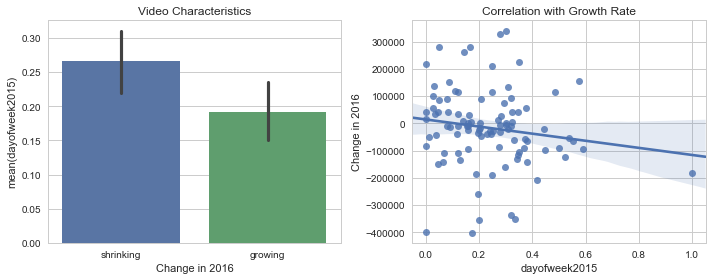

Test statistic: -2.229913
p-value: 0.028108


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         viewChange2016   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.224
Date:                Mon, 26 Feb 2018   Prob (F-statistic):              0.139
Time:                        01:08:57   Log-Likelihood:                -1287.2
No. Observations:                  97   AIC:                             2578.
Df Residuals:                      95   BIC:                             2584.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const          1.448e+04    2.5e+04      0.578      0.564     -3.52e+04  6.42e+04
dayofweek2015 -1.304e+05   8.74e+04     -1.491      0.139     -3.04e+05  4.32e+04
==============================================================================
Omnibus:                        5.741   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                7.566
Skew:                          -0.217   Prob(JB):                       0.0228
Kurtosis:                       4.297   Cond. No.                         6.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
col='dayofweek2015'
title='Video Characteristics'
fig, axes = plt.subplots(1,2,figsize=(10,4))
_=sns.barplot(x='viewLabel2016', y=col,order=order,data=df_grow_2015, ax=axes[0])
_=sns.regplot(x=col, y='viewChange2016',data=df_grow_2015, ax=axes[1])
_=axes[0].set_title(title)
_=axes[1].set_title('Correlation with Growth Rate')
_=axes[0].set_xlabel('Change in 2016')
_=axes[1].set_ylabel('Change in 2016')
plt.tight_layout()
plt.show()

import scipy as sp
a = df_grow_2015[df_grow_2015['viewLabel2016']=='growing'][col]
b = df_grow_2015[df_grow_2015['viewLabel2016']=='shrinking'][col]
results=sp.stats.ttest_ind(a, b)
print('Test statistic: %f' % results[0])
print('p-value: %f' % results[1])

y = df_grow_2015['viewChange2016']  # response
X = df_grow_2015[col] # predictor
X = sm.add_constant(X)
est = sm.OLS(y.astype(float), X.astype(float))
est = est.fit()
est.summary()

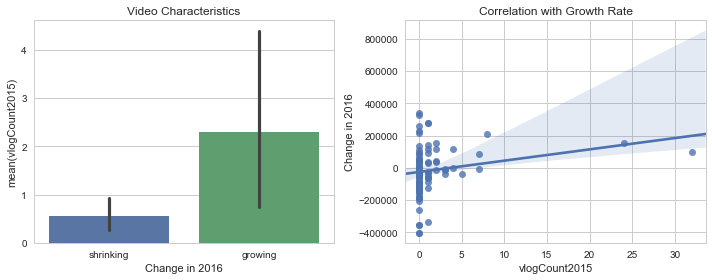

Test statistic: 2.031270
p-value: 0.045021


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         viewChange2016   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     4.288
Date:                Mon, 26 Feb 2018   Prob (F-statistic):             0.0411
Time:                        01:09:00   Log-Likelihood:                -1286.2
No. Observations:                  97   AIC:                             2576.
Df Residuals:                      95   BIC:                             2582.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const         -2.511e+04   1.49e+04     -1.686      0.095     -5.47e+04  4457.055
vlogCount2015  7003.5051   3382.074      2.071      0.041       289.240  1.37e+04
==============================================================================
Omnibus:                        4.446   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                5.634
Skew:                          -0.080   Prob(JB):                       0.0598
Kurtosis:                       4.170   Cond. No.                         4.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
col='vlogCount2015'
fig, axes = plt.subplots(1,2,figsize=(10,4))
_=sns.barplot(x='viewLabel2016', y=col,order=order,data=df_grow_2015, ax=axes[0])
_=sns.regplot(x=col, y='viewChange2016',data=df_grow_2015, ax=axes[1])
_=axes[0].set_title('Video Characteristics')
_=axes[1].set_title('Correlation with Growth Rate')
_=axes[0].set_xlabel('Change in 2016')
_=axes[1].set_ylabel('Change in 2016')
plt.tight_layout()
plt.show()

import scipy as sp
a = df_grow_2015[df_grow_2015['viewLabel2016']=='growing'][col]
b = df_grow_2015[df_grow_2015['viewLabel2016']=='shrinking'][col]
results=sp.stats.ttest_ind(a, b)
print('Test statistic: %f' % results[0])
print('p-value: %f' % results[1])

y = df_grow_2015['viewChange2016']  # response
X = df_grow_2015[col] # predictor
X = sm.add_constant(X)
est = sm.OLS(y.astype(float), X.astype(float))
est = est.fit()
est.summary()

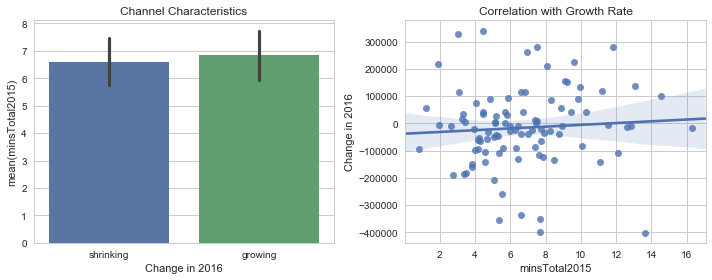

Test statistic: 0.379737
p-value: 0.704989


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         viewChange2016   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4627
Date:                Mon, 26 Feb 2018   Prob (F-statistic):              0.498
Time:                        01:09:14   Log-Likelihood:                -1288.1
No. Observations:                  97   AIC:                             2580.
Df Residuals:                      95   BIC:                             2585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const         -3.793e+04   3.52e+04     -1.076      0.285     -1.08e+05   3.2e+04
minsTotal2015  3259.7881   4792.303      0.680      0.498     -6254.135  1.28e+04
==============================================================================
Omnibus:                        4.949   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                6.002
Skew:                          -0.195   Prob(JB):                       0.0497
Kurtosis:                       4.154   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
col='minsTotal2015'
fig, axes = plt.subplots(1,2,figsize=(10,4))
_=sns.barplot(x='viewLabel2016', y=col,order=order,data=df_grow_2015, ax=axes[0])
_=sns.regplot(x=col, y='viewChange2016',data=df_grow_2015, ax=axes[1])
_=axes[0].set_title('Channel Characteristics')
_=axes[1].set_title('Correlation with Growth Rate')
_=axes[0].set_xlabel('Change in 2016')
_=axes[1].set_ylabel('Change in 2016')
plt.tight_layout()
plt.show()

import scipy as sp
a = df_grow_2015[df_grow_2015['viewLabel2016']=='growing'][col]
b = df_grow_2015[df_grow_2015['viewLabel2016']=='shrinking'][col]
results=sp.stats.ttest_ind(a, b)
print('Test statistic: %f' % results[0])
print('p-value: %f' % results[1])

y = df_grow_2015['viewChange2016']  # response
X = df_grow_2015[col] # predictor
X = sm.add_constant(X)
est = sm.OLS(y.astype(float), X.astype(float))
est = est.fit()
est.summary()

### Channel Characteristics

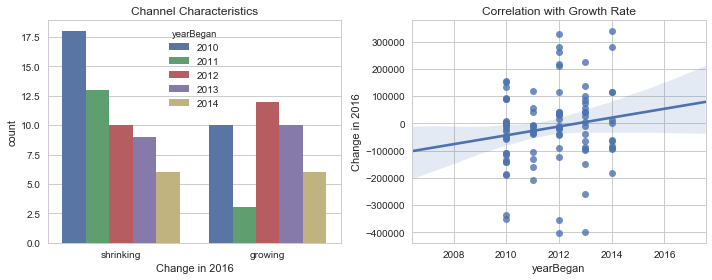

Test statistic: 0.379737
p-value: 0.704989


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         viewChange2016   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.454
Date:                Mon, 26 Feb 2018   Prob (F-statistic):              0.121
Time:                        01:09:17   Log-Likelihood:                -1287.1
No. Observations:                  97   AIC:                             2578.
Df Residuals:                      95   BIC:                             2583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       -3.27e+07   2.09e+07     -1.567      0.120     -7.41e+07  8.72e+06
yearBegan   1.625e+04   1.04e+04      1.567      0.121     -4341.688  3.68e+04
==============================================================================
Omnibus:                        4.481   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                4.544
Skew:                          -0.264   Prob(JB):                        0.103
Kurtosis:                       3.920   Cond. No.                     2.92e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
order=['shrinking','growing']
fig, axes = plt.subplots(1,2,figsize=(10,4))
_=sns.countplot(x='viewLabel2016',order=order, hue='yearBegan',data=df_grow_2015, ax=axes[0])
_=sns.regplot(x='yearBegan', y='viewChange2016',data=df_grow_2015, ax=axes[1])
_=axes[0].set_title('Channel Characteristics')
_=axes[1].set_title('Correlation with Growth Rate')
_=axes[0].set_xlabel('Change in 2016')
_=axes[1].set_ylabel('Change in 2016')
plt.tight_layout()
plt.show()

import scipy as sp
a, b=df_grow_2015[df_grow_2015['viewLabel2016']=='growing'][col], df_grow_2015[df_grow_2015['viewLabel2016']=='shrinking'][col]
results=sp.stats.ttest_ind(a, b)
print('Test statistic: %f' % results[0])
print('p-value: %f' % results[1])

y = df_grow_2015['viewChange2016']  # response
X = df_grow_2015['yearBegan'] # predictor
X = sm.add_constant(X)
est = sm.OLS(y.astype(float), X.astype(float))
est = est.fit()
est.summary()

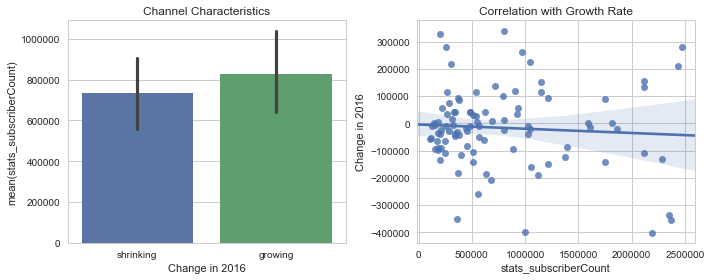

Test statistic: 0.725662
p-value: 0.469830


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         viewChange2016   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4754
Date:                Mon, 26 Feb 2018   Prob (F-statistic):              0.492
Time:                        01:09:22   Log-Likelihood:                -1288.1
No. Observations:                  97   AIC:                             2580.
Df Residuals:                      95   BIC:                             2585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                 -4004.9609   2.28e+04     -0.176      0.861     -4.92e+04  4.12e+04
stats_subscriberCount    -0.0156      0.023     -0.690      0.492        -0.061     0.029
==============================================================================
Omnibus:                        2.836   Durbin-Watson:                   2.165
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.736
Skew:                          -0.039   Prob(JB):                        0.255
Kurtosis:                       3.819   Cond. No.                     1.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
col='stats_subscriberCount'
fig, axes = plt.subplots(1,2,figsize=(10,4))
_=sns.barplot(x='viewLabel2016', y=col,order=order,data=df_grow_2015, ax=axes[0])
_=sns.regplot(x=col, y='viewChange2016',data=df_grow_2015, ax=axes[1])
_=axes[0].set_title('Channel Characteristics')
_=axes[1].set_title('Correlation with Growth Rate')
_=axes[0].set_xlabel('Change in 2016')
_=axes[1].set_ylabel('Change in 2016')
plt.tight_layout()
plt.show()

import scipy as sp
a = df_grow_2015[df_grow_2015['viewLabel2016']=='growing'][col]
b = df_grow_2015[df_grow_2015['viewLabel2016']=='shrinking'][col]
results=sp.stats.ttest_ind(a, b)
print('Test statistic: %f' % results[0])
print('p-value: %f' % results[1])

y = df_grow_2015['viewChange2016']  # response
X = df_grow_2015[col] # predictor
X = sm.add_constant(X)
est = sm.OLS(y.astype(float), X.astype(float))
est = est.fit()
est.summary()

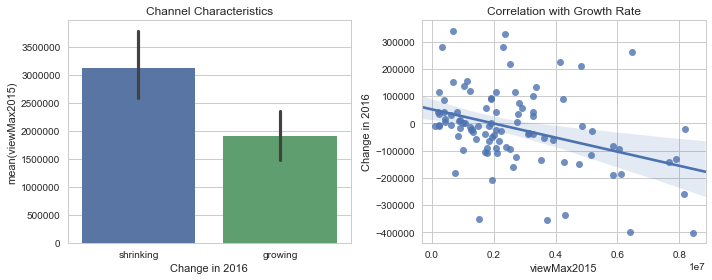

Test statistic: -3.034904
p-value: 0.003104


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         viewChange2016   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     15.04
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           0.000194
Time:                        01:09:26   Log-Likelihood:                -1281.2
No. Observations:                  97   AIC:                             2566.
Df Residuals:                      95   BIC:                             2572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        5.143e+04    2.2e+04      2.332      0.022      7654.050  9.52e+04
viewMax2015    -0.0259      0.007     -3.878      0.000        -0.039    -0.013
==============================================================================
Omnibus:                        5.902   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                6.667
Skew:                           0.322   Prob(JB):                       0.0357
Kurtosis:                       4.111   Cond. No.                     5.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
col='viewMax2015'
fig, axes = plt.subplots(1,2,figsize=(10,4))
_=sns.barplot(x='viewLabel2016', y=col,order=order,data=df_grow_2015, ax=axes[0])
_=sns.regplot(x=col, y='viewChange2016',data=df_grow_2015, ax=axes[1])
_=axes[0].set_title('Channel Characteristics')
_=axes[1].set_title('Correlation with Growth Rate')
_=axes[0].set_xlabel('Change in 2016')
_=axes[1].set_ylabel('Change in 2016')
plt.tight_layout()
plt.show()

import scipy as sp
a = df_grow_2015[df_grow_2015['viewLabel2016']=='growing'][col]
b = df_grow_2015[df_grow_2015['viewLabel2016']=='shrinking'][col]
results=sp.stats.ttest_ind(a, b)
print('Test statistic: %f' % results[0])
print('p-value: %f' % results[1])

y = df_grow_2015['viewChange2016']  # response
X = df_grow_2015[col] # predictor
X = sm.add_constant(X)
est = sm.OLS(y.astype(float), X.astype(float))
est = est.fit()
est.summary()

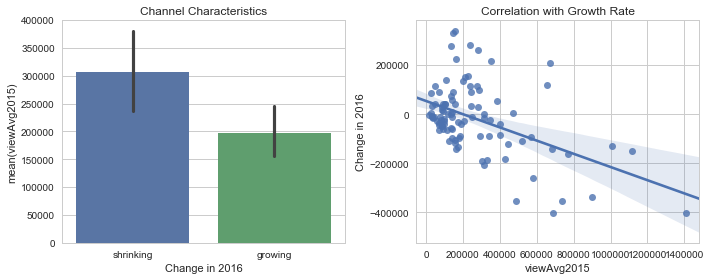

Test statistic: -2.130816
p-value: 0.035687


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         viewChange2016   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     28.08
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           7.52e-07
Time:                        01:09:31   Log-Likelihood:                -1275.8
No. Observations:                  97   AIC:                             2556.
Df Residuals:                      95   BIC:                             2561.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        5.399e+04   1.84e+04      2.935      0.004      1.75e+04  9.05e+04
viewAvg2015    -0.2689      0.051     -5.300      0.000        -0.370    -0.168
==============================================================================
Omnibus:                       10.709   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.814
Skew:                           0.753   Prob(JB):                      0.00448
Kurtosis:                       3.637   Cond. No.                     5.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
col='viewAvg2015'
fig, axes = plt.subplots(1,2,figsize=(10,4))
_=sns.barplot(x='viewLabel2016', y=col,order=order,data=df_grow_2015, ax=axes[0])
_=sns.regplot(x=col, y='viewChange2016',data=df_grow_2015, ax=axes[1])
_=axes[0].set_title('Channel Characteristics')
_=axes[1].set_title('Correlation with Growth Rate')
_=axes[0].set_xlabel('Change in 2016')
_=axes[1].set_ylabel('Change in 2016')
plt.tight_layout()
plt.show()

import scipy as sp
a = df_grow_2015[df_grow_2015['viewLabel2016']=='growing'][col]
b = df_grow_2015[df_grow_2015['viewLabel2016']=='shrinking'][col]
results=sp.stats.ttest_ind(a, b)
print('Test statistic: %f' % results[0])
print('p-value: %f' % results[1])

y = df_grow_2015['viewChange2016']  # response
X = df_grow_2015[col] # predictor
X = sm.add_constant(X)
est = sm.OLS(y.astype(float), X.astype(float))
est = est.fit()
est.summary()

# Graphs for presentation

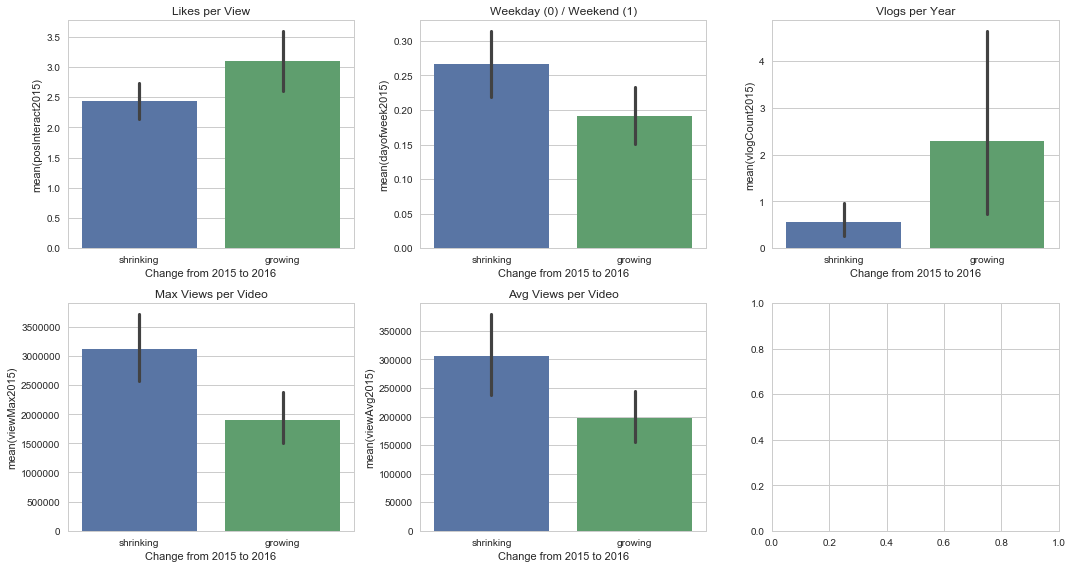

In [287]:
fig, axes = plt.subplots(2,3,figsize=(15,8))
_=sns.barplot(x='viewLabel2016', y='posInteract2015',order=order,data=df_grow_2015, ax=axes[0,0])
_=sns.barplot(x='viewLabel2016', y='dayofweek2015',order=order,data=df_grow_2015, ax=axes[0,1])
_=sns.barplot(x='viewLabel2016', y='vlogCount2015',order=order,data=df_grow_2015, ax=axes[0,2])
_=sns.barplot(x='viewLabel2016', y='viewMax2015',order=order,data=df_grow_2015, ax=axes[1,0])
_=sns.barplot(x='viewLabel2016', y='viewAvg2015',order=order,data=df_grow_2015, ax=axes[1,1])

_=axes[0,0].set_title('Likes per View')
_=axes[0,1].set_title('Weekday (0) / Weekend (1)')
_=axes[0,2].set_title('Vlogs per Year')
_=axes[1,0].set_title('Max Views per Video')
_=axes[1,1].set_title('Avg Views per Video')

_=axes[0,0].set_xlabel('Change from 2015 to 2016')
_=axes[0,1].set_xlabel('Change from 2015 to 2016')
_=axes[0,2].set_xlabel('Change from 2015 to 2016')
_=axes[1,0].set_xlabel('Change from 2015 to 2016')
_=axes[1,1].set_xlabel('Change from 2015 to 2016')
plt.tight_layout()
plt.show()

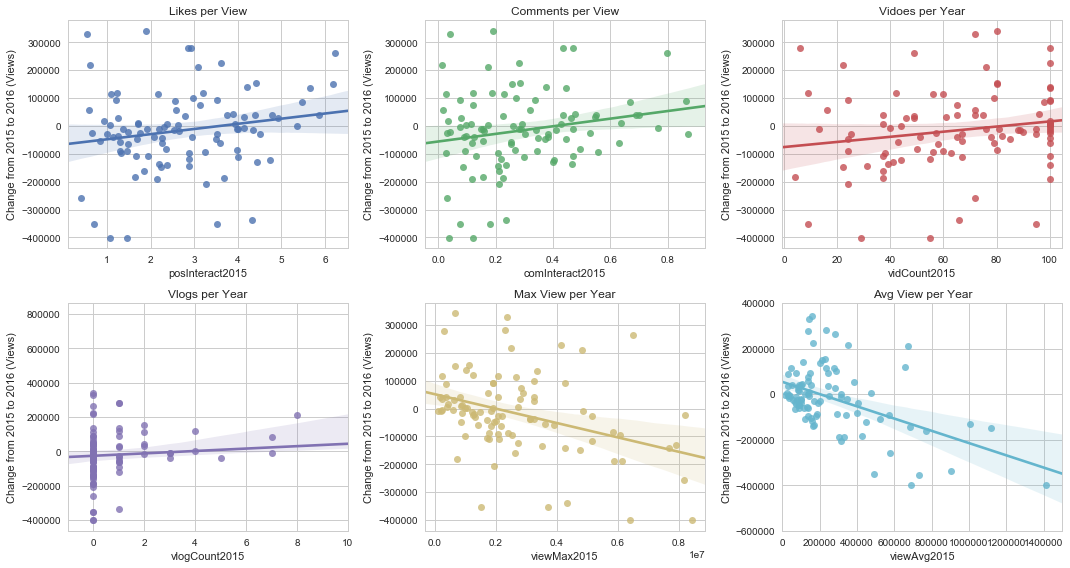

In [116]:
fig, axes = plt.subplots(2,3,figsize=(15,8))
_=sns.regplot(x='posInteract2015', y='viewChange2016',data=df_grow_2015, ax=axes[0,0])
_=sns.regplot(x='comInteract2015', y='viewChange2016',data=df_grow_2015, ax=axes[0,1])
_=sns.regplot(x='vidCount2015', y='viewChange2016',data=df_grow_2015, ax=axes[0,2])
_=sns.regplot(x='vlogCount2015', y='viewChange2016',data=df_grow_2015, ax=axes[1,0])
_=sns.regplot(x='viewMax2015', y='viewChange2016',data=df_grow_2015, ax=axes[1,1])
_=sns.regplot(x='viewAvg2015', y='viewChange2016',data=df_grow_2015, ax=axes[1,2])

_=axes[0,0].set_title('Likes per View')
_=axes[0,1].set_title('Comments per View')
_=axes[0,2].set_title('Vidoes per Year')
_=axes[1,0].set_title('Vlogs per Year')
_=axes[1,1].set_title('Max View per Year')
_=axes[1,2].set_title('Avg View per Year')

_=axes[0,0].set_ylabel('Change from 2015 to 2016 (Views)')
_=axes[0,1].set_ylabel('Change from 2015 to 2016 (Views)')
_=axes[0,2].set_ylabel('Change from 2015 to 2016 (Views)')
_=axes[1,0].set_ylabel('Change from 2015 to 2016 (Views)')
_=axes[1,1].set_ylabel('Change from 2015 to 2016 (Views)')
_=axes[1,2].set_ylabel('Change from 2015 to 2016 (Views)')

_=axes[1,0].set_xlim(-1,10)
_=axes[1,2].set_xlim(0,1500000)
_=axes[1,2].set_ylim(-600000,400000)

plt.tight_layout()
plt.show()

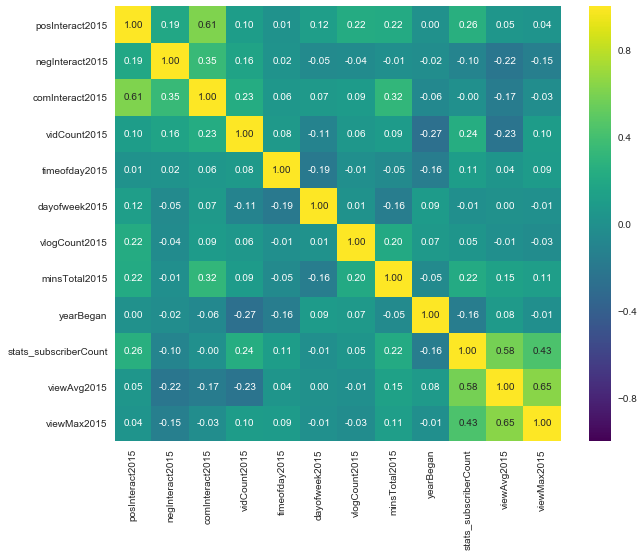

In [118]:
col =[
    'posInteract2015',      #viewer interaction
    'negInteract2015',      #viewer interaction
    'comInteract2015',      #viewer interaction
    'vidCount2015',          #channel activity
    'timeofday2015',         #video characterstics
    'dayofweek2015',         #video characterstics
    'vlogCount2015',         #video characterstics
    #'plistCount2015',        #video characteristics
    'minsTotal2015',       #video characterstics
    'yearBegan',             #channel info
    'stats_subscriberCount',  #channel info
    'viewAvg2015',            #channel info
    'viewMax2015'             #channel info
] 

X=df5[col]

#view correlation of variables
fig, ax1 = plt.subplots(1,1,figsize=(10,8))
_=sns.heatmap(X.corr(), annot=True, fmt = ".2f", cmap = "viridis", ax=ax1)

# Model 1: Predict channel catagory in subsequent year (continue growing or not)

Define independent variables and remove variables with higher correlation (>0.25) <br>
This step is done as variables of the svm must be independent of each other. My definition of independence is an R2 value of less than 0.25

17    0
Name: viewLabel2016_2, dtype: int64

,posInteract2015,dayofweek2015,vlogCount2015,viewMax2015
17,4.348283,0.090909,0.0,1226169.0


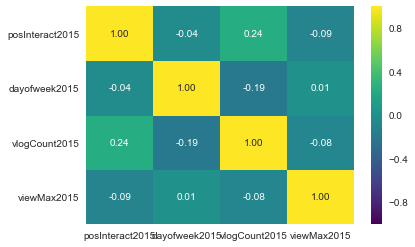

In [290]:
# define depedendent variable
y=df_grow_2015['viewLabel2016_2'] # 0 is shrinking, 1 is growing
y.head(1)

# define indepednent variables
col =[
    'posInteract2015',      #viewer interaction
    #'negInteract2015',      #viewer interaction
    #'comInteract2015',      #viewer interaction
    #'vidCount2015',          #channel activity
    #'timeofday2015',         #video characterstics
    'dayofweek2015',         #video characterstics
    'vlogCount2015',         #video characterstics
    #'plistCount2015',
    #'minsTotal2015',       #video characterstics
    #'yearBegan',             #channel info
    #'stats_subscriberCount',  #channel info
    #'viewAvg2015',            #channel info
    'viewMax2015'             #channel info
] 

X=df_grow_2015[col]
X.head(1)

#view correlation of variables
g = sns.heatmap(X.corr(), annot=True, fmt = ".2f", cmap = "viridis")

## Support Vector Machine (sklearn)

In [120]:
# split data into training and testing sets
print('1. Split data into training and testing sets\n')
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Length of train set: %f' % len(X_train))
print('Length of test set: %f\n' % len(X_test))

# scale data
print('2. Scale data\n')
from sklearn.preprocessing import StandardScaler
sc_train = StandardScaler()
X_train=sc_train.fit_transform(X_train)
X_test=sc_train.fit_transform(X_test)

# run model
print('3. Run model')
from sklearn import svm
model = svm.SVC(kernel='poly', degree=10)
model.fit(X_train, y_train)
ytest_true=np.array(y_test)
ytest_pred=model.predict(X_test)

# view accuracy
print('4. View accuracy\n')
from sklearn import metrics
accuracy_measure=metrics.accuracy_score(ytest_true, ytest_pred, normalize=True, sample_weight=None)
print('Accuracy of test set: %f\n' % accuracy_measure)
#must print classification report else syntax is weird
print(metrics.classification_report(ytest_true, ytest_pred, labels=None, target_names=None, sample_weight=None, digits=3))

from sklearn.metrics import confusion_matrix
print('confusion matrix')
confusion_matrix(ytest_true, ytest_pred)

1. Split data into training and testing sets

Length of train set: 77.000000
Length of test set: 20.000000

2. Scale data

3. Run model


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

4. View accuracy

Accuracy of test set: 0.600000

             precision    recall  f1-score   support

          0      0.600     0.818     0.692        11
          1      0.600     0.333     0.429         9

avg / total      0.600     0.600     0.574        20

confusion matrix


array([[9, 2],
       [6, 3]])

## Logistic Regression (sklearn)

In [121]:
# split data into training and testing sets
print('1. Split data into training and testing sets\n')
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Length of train set: %f' % len(X_train))
print('Length of test set: %f\n' % len(X_test))

# Logistic regression
print('2. Run model\n')
from sklearn.linear_model import LogisticRegression
_=logreg = LogisticRegression()
_=logreg.fit(X_train, y_train)

# view accuracy
print('3. View accuracy\n')

# classification report
print('Logistic Regression score for training set: %f\n' % logreg.score(X_train, y_train))
from sklearn.metrics import classification_report
y_true, y_pred = y_test, logreg.predict(X_test)
print(classification_report(y_true, y_pred))

# calculate percent correct
Y_pred = logreg.predict(X_test)
Y_test = np.asarray(y_test)
correct=1-sum(abs(Y_pred-Y_test))/len(Y_pred)
print('percent correct (accuracy): %f\n' % correct)

1. Split data into training and testing sets

Length of train set: 77.000000
Length of test set: 20.000000

2. Run model

3. View accuracy

Logistic Regression score for training set: 0.584416

             precision    recall  f1-score   support

          0       0.55      1.00      0.71        11
          1       0.00      0.00      0.00         9

avg / total       0.30      0.55      0.39        20

percent correct (accuracy): 0.550000



## K-Nearest Neighbor (sklearn)

In [122]:
# split data into training and testing sets
print('1. Split data into training and testing sets\n')
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Length of train set: %f' % len(X_train))
print('Length of test set: %f\n' % len(X_test))

# scale data
print('2. Scale data\n')
from sklearn.preprocessing import StandardScaler
sc_train = StandardScaler()
X_train=sc_train.fit_transform(X_train)
X_test=sc_train.fit_transform(X_test)

#K Neighbors Classifier
print('3. Run the model')
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print('Training set score: %f' % knn.score(X_train, y_train))

# testing set
Y_true, Y_pred = np.asarray(Y_test), knn.predict(X_test)

# Confusion matrix
print('')
print('Confusion Matrix')
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_true, Y_pred)

# Calculate percent correct
percent=(1-sum(abs(Y_pred-Y_true))/len(Y_pred))*100
print('Testing set, accuracy: %f' % percent)
print('Testing set, error rate: %f' % (100-percent))

# RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_true, Y_pred)
print('Testing set, RMSE: %f' % rmse)

1. Split data into training and testing sets

Length of train set: 77.000000
Length of test set: 20.000000

2. Scale data

3. Run the model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Training set score: 0.740260

Confusion Matrix


array([[8, 3],
       [2, 7]])

Testing set, accuracy: 75.000000
Testing set, error rate: 25.000000
Testing set, RMSE: 0.250000


## Random Forest (sklearn)

In [123]:
# split data into training and testing sets
print('1. Split data into training and testing sets\n')
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Length of train set: %f' % len(X_train))
print('Length of test set: %f\n' % len(X_test))

print('2. Dont scale the data\n')

# Random Forest
print('3. Run the model')
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
print('Training set score: %f' % random_forest.score(X_train, y_train))

# test data
Y_true, Y_pred = np.asarray(y_test), random_forest.predict(X_test)

# Confusion matrix
print('')
print('Confusion Matrix')
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_true, Y_pred)

# Calculate percent correct
percent=(1-sum(abs(Y_pred-Y_true))/len(Y_pred))*100
print('Testing set, accuracy: %f' % percent)
print('Testing set, error rate: %f' % (100-percent))

# RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_true, Y_pred)
print('Testing set, RMSE: %f' % rmse)

1. Split data into training and testing sets

Length of train set: 77.000000
Length of test set: 20.000000

2. Dont scale the data

3. Run the model


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Training set score: 1.000000

Confusion Matrix


array([[7, 4],
       [4, 5]])

Testing set, accuracy: 60.000000
Testing set, error rate: 40.000000
Testing set, RMSE: 0.400000


# Use principle component analysis to reduce number of dimensions

define arrays

In [336]:
col1 =[
    'posInteract2015',      #viewer interaction
    'negInteract2015',      #viewer interaction
    'comInteract2015'       #viewer interaction
]
    
col2 =[
    'vidCount2015'          #channel activity
]    

col3 =[
    'timeofday2015',         #video characterstics
    'dayofweek2015',         #video characterstics
    'vlogCount2015',         #video characterstics
    'minsTotal2015'          #video characterstics 
]

col4 =[    
    'yearBegan',             #channel characteristics
    'stats_subscriberCount',  #channel characteristics
    'viewAvg2015',            #channel characteristics
    'viewMax2015'             #channel characteristics
]

y=np.array(df_grow_2015['viewLabel2016_2'])
X1=np.array(df_grow_2015[col1])
X2=np.array(df_grow_2015[col2])
X3=np.array(df_grow_2015[col3])
X4=np.array(df_grow_2015[col4])

Run principle component analysis to extract first principle component.

In [337]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1).fit(X1) 
#pca2 = PCA(n_components=1).fit(X2) #already is one component
pca3 = PCA(n_components=1).fit(X3) 
pca4 = PCA(n_components=1).fit(X4)

#view components
print('components\n')
print(pca1.components_,'\n')
print(pca1.explained_variance_,'\n')
#print(pca2.components_,'\n')
#print(pca2.explained_variance_,'\n')
print(pca3.components_,'\n')
print(pca3.explained_variance_,'\n')
print(pca4.components_,'\n')
print(pca4.explained_variance_,'\n')

#transform
X_pca1 = pca1.transform(X1)
X_pca2 = X2
X_pca3 = pca3.transform(X3)
X_pca4 = pca4.transform(X4)

#view dimensions
print('dimensions')
X_pca1.shape
X_pca2.shape
X_pca3.shape
X_pca3.shape

#create final dataset
print('final')
X_pca=np.concatenate((X_pca1,X_pca2,X_pca3,X_pca4),axis=1)
X_pca.shape

components

[[ 0.99645546  0.00232649  0.08408984]] 

[ 2.00495086] 

[[ 0.00218139 -0.00851938  0.93168665  0.3631565 ]] 

[ 19.26325625] 

[[ -4.94138316e-08   1.26938444e-01   7.42154152e-02   9.89130276e-01]] 

[  4.19875514e+12] 

dimensions


(97, 1)

(97, 1)

(97, 1)

(97, 1)

final


(97, 4)

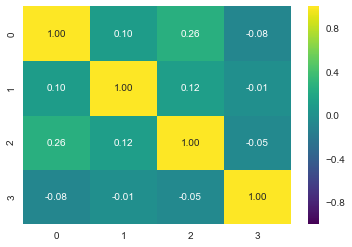

In [338]:
tmp=pd.DataFrame(X_pca)
g = sns.heatmap(tmp.corr(), annot=True, fmt = ".2f", cmap = "viridis")

## Support Vector Machine (PCA)

In [339]:
# split data into training and testing sets
print('1. Split data into training and testing sets\n')
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 0)
print('Length of train set: %f' % len(X_train))
print('Length of test set: %f\n' % len(X_test))

# scale data
print('2. Scale data\n')
from sklearn.preprocessing import StandardScaler
sc_train = StandardScaler()
X_train=sc_train.fit_transform(X_train)
X_test=sc_train.fit_transform(X_test)

# run model
print('3. Run model')
from sklearn import svm
model = svm.SVC(kernel='poly', degree=10)
model.fit(X_train, y_train)
ytest_true=np.array(y_test)
ytest_pred=model.predict(X_test)

# view accuracy
print('4. View accuracy\n')
from sklearn import metrics
accuracy_measure=metrics.accuracy_score(ytest_true, ytest_pred, normalize=True, sample_weight=None)
print('Accuracy of test set: %f\n' % accuracy_measure)
#must print classification report else syntax is weird
print(metrics.classification_report(ytest_true, ytest_pred, labels=None, target_names=None, sample_weight=None, digits=3))

from sklearn.metrics import confusion_matrix
print('confusion matrix')
confusion_matrix(ytest_true, ytest_pred)

1. Split data into training and testing sets

Length of train set: 77.000000
Length of test set: 20.000000

2. Scale data

3. Run model


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

4. View accuracy

Accuracy of test set: 0.650000

             precision    recall  f1-score   support

          0      0.625     0.909     0.741        11
          1      0.750     0.333     0.462         9

avg / total      0.681     0.650     0.615        20

confusion matrix


array([[10,  1],
       [ 6,  3]])

## Logistic Regression (PCA)

In [340]:
# split data into training and testing sets
print('1. Split data into training and testing sets\n')
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 0)
print('Length of train set: %f' % len(X_train))
print('Length of test set: %f\n' % len(X_test))

# Logistic regression
print('2. Run model\n')
from sklearn.linear_model import LogisticRegression
_=logreg = LogisticRegression()
_=logreg.fit(X_train, y_train)

# view accuracy
print('3. View accuracy\n')

# classification report
print('Logistic Regression score for training set: %f\n' % logreg.score(X_train, y_train))
from sklearn.metrics import classification_report
y_true, y_pred = y_test, logreg.predict(X_test)
print(classification_report(y_true, y_pred))

# calculate percent correct
Y_pred = logreg.predict(X_test)
Y_test = np.asarray(y_test)
correct=1-sum(abs(Y_pred-Y_test))/len(Y_pred)
print('percent correct (accuracy): %f\n' % correct)

1. Split data into training and testing sets

Length of train set: 77.000000
Length of test set: 20.000000

2. Run model

3. View accuracy

Logistic Regression score for training set: 0.610390

             precision    recall  f1-score   support

          0       0.38      0.27      0.32        11
          1       0.33      0.44      0.38         9

avg / total       0.36      0.35      0.35        20

percent correct (accuracy): 0.350000



## K-Nearest Neighbor (PCA)

In [341]:
# split data into training and testing sets
print('1. Split data into training and testing sets\n')
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 0)
print('Length of train set: %f' % len(X_train))
print('Length of test set: %f\n' % len(X_test))

# scale data
print('2. Scale data\n')
from sklearn.preprocessing import StandardScaler
sc_train = StandardScaler()
X_train=sc_train.fit_transform(X_train)
X_test=sc_train.fit_transform(X_test)

#K Neighbors Classifier
print('3. Run the model')
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print('Training set score: %f' % knn.score(X_train, y_train))

# testing set
Y_true, Y_pred = np.asarray(Y_test), knn.predict(X_test)

# Confusion matrix
print('')
print('Confusion Matrix')
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_true, Y_pred)

# Calculate percent correct
percent=(1-sum(abs(Y_pred-Y_true))/len(Y_pred))*100
print('Testing set, accuracy: %f' % percent)
print('Testing set, error rate: %f' % (100-percent))

# RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_true, Y_pred)
print('Testing set, RMSE: %f' % rmse)

1. Split data into training and testing sets

Length of train set: 77.000000
Length of test set: 20.000000

2. Scale data

3. Run the model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Training set score: 0.714286

Confusion Matrix


array([[6, 5],
       [5, 4]])

Testing set, accuracy: 50.000000
Testing set, error rate: 50.000000
Testing set, RMSE: 0.500000


## Random Forest (PCA)

In [342]:
# split data into training and testing sets
print('1. Split data into training and testing sets\n')
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 0)
print('Length of train set: %f' % len(X_train))
print('Length of test set: %f\n' % len(X_test))

print('2. Dont scale the data\n')

# Random Forest
print('3. Run the model')
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
print('Training set score: %f' % random_forest.score(X_train, y_train))

# test data
Y_true, Y_pred = np.asarray(y_test), random_forest.predict(X_test)

# Confusion matrix
print('')
print('Confusion Matrix')
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_true, Y_pred)

# Calculate percent correct
percent=(1-sum(abs(Y_pred-Y_true))/len(Y_pred))*100
print('Testing set, accuracy: %f' % percent)
print('Testing set, error rate: %f' % (100-percent))

# RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_true, Y_pred)
print('Testing set, RMSE: %f' % rmse)

1. Split data into training and testing sets

Length of train set: 77.000000
Length of test set: 20.000000

2. Dont scale the data

3. Run the model


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Training set score: 1.000000

Confusion Matrix


array([[8, 3],
       [3, 6]])

Testing set, accuracy: 70.000000
Testing set, error rate: 30.000000
Testing set, RMSE: 0.300000


# Model 2: Predict amount of change in subsequent year

## Multiple linear regression

17   -13433.0
Name: viewChange2016, dtype: float64

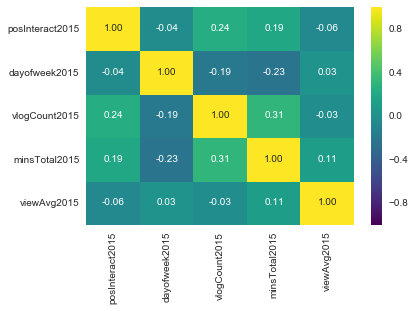

In [125]:
# define dependent variable
y=df_grow_2015['viewChange2016']
y.head(1)

# define indepedent variables
col =[
    'posInteract2015',      #viewer interaction
    #'negInteract2015',      #viewer interaction
    #'comInteract2015',      #viewer interaction
    #'vidCount2015',          #channel activity
    #'timeofday2015',         #video characterstics
    'dayofweek2015',         #video characterstics
    'vlogCount2015',         #video characterstics
    #'plistCount2015',
    'minsTotal2015',       #video characterstics
    #'yearBegan',             #channel info
    #'stats_subscriberCount',  #channel info
    #'viewMax2015',            #channel info
    'viewAvg2015'          #channel info
] 

X=df_grow_2015[col]

#view correlation of variables
g = sns.heatmap(X.corr(), annot=True, fmt = ".2f", cmap = "viridis")

scale data and run model

1. Split data into training and testing sets

Length of train set: 77.000000
Length of test set: 20.000000

2. Run model

2. View accuracy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         viewChange2016   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     6.817
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           2.96e-05
Time:                        01:14:08   Log-Likelihood:                -1011.2
No. Observations:                  77   AIC:                             2032.
Df Residuals:                      72   BIC:                             2044.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
posInteract2015  7600.9756   1.03e+04      0.735      0.465      -1.3e+04  2.82e+04
dayofweek2015    1742.8551   7.77e+04      0.022      0.982     -1.53e+05  1.57e+05
vlogCount2015    9854.3068   5274.388      1.868      0.066      -659.993  2.04e+04
minsTotal2015    2185.8702   4090.223      0.534      0.595     -5967.840  1.03e+04
viewAvg2015        -0.2592      0.053     -4.885      0.000        -0.365    -0.153
==============================================================================
Omnibus:                       11.951   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.550
Skew:                           0.849   Prob(JB):                      0.00188
Kurtosis:                       4.015   Cond. No.                     2.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

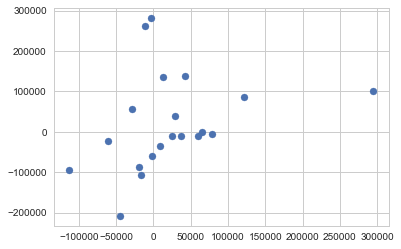

In [126]:
# split data into training and testing sets
print('1. Split data into training and testing sets\n')
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Length of train set: %f' % len(X_train))
print('Length of test set: %f\n' % len(X_test))

# run model
print('2. Run model\n')
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

# view accuracy
print('2. View accuracy\n')

# calculate percent correct
Y_test, Y_pred = np.asarray(y_test), model.predict(X_test)
plt.scatter(Y_pred,Y_test)

model.summary()